In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Get stock data from finance yahoo data

import requests
nan=np.nan

In [5]:
def get_stock_data(stock_symbol, start_date, end_date):
    base_url = f'https://api.tiingo.com/tiingo/daily/{stock_symbol}/prices?'
    token = '59e2dfca5859e44a55ef766a8f81aab1ab8a80e8'
    payload = {
        'startDate': start_date,
        'endDate': end_date,
        'token': token
    }
    response = requests.get(base_url, params=payload)
    return response

In [6]:
ticker = 'AMZN'
st_date = '2020-3-26'
#st_date = '2020-8-10'
en_date = '2020-9-8'

response = get_stock_data(ticker, st_date, en_date)
print(response.url)
print(response.json())

https://api.tiingo.com/tiingo/daily/AMZN/prices?startDate=2020-3-26&endDate=2020-9-8&token=59e2dfca5859e44a55ef766a8f81aab1ab8a80e8
[{'date': '2020-03-26T00:00:00.000Z', 'close': 1955.49, 'high': 1956.49, 'low': 1889.29, 'open': 1902.0, 'volume': 6235118, 'adjClose': 1955.49, 'adjHigh': 1956.49, 'adjLow': 1889.29, 'adjOpen': 1902.0, 'adjVolume': 6235118, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-03-27T00:00:00.000Z', 'close': 1900.1, 'high': 1939.79, 'low': 1899.92, 'open': 1930.86, 'volume': 5387897, 'adjClose': 1900.1, 'adjHigh': 1939.79, 'adjLow': 1899.92, 'adjOpen': 1930.86, 'adjVolume': 5387897, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-03-30T00:00:00.000Z', 'close': 1963.95, 'high': 1973.63, 'low': 1912.34, 'open': 1922.83, 'volume': 6126087, 'adjClose': 1963.95, 'adjHigh': 1973.63, 'adjLow': 1912.34, 'adjOpen': 1922.83, 'adjVolume': 6126087, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-03-31T00:00:00.000Z', 'close': 1949.72, 'high': 1993.02, 'low': 194

In [7]:
def parse_data(data_response):
    json_data = data_response.json()
    dates = []
    closes =[]
    opens = []
    highs = []
    lows = []
    vols = []
    for json_object in json_data:
        dates.append(json_object['date'])
        closes.append(json_object['close'])
        opens.append(json_object['open'])
        highs.append(json_object['high'])
        lows.append(json_object['low'])
        vols.append(json_object['volume'])
    return dates, closes, opens, highs, lows, vols

In [8]:
dates, closes, opens, highs, lows, vols = parse_data(response)
print(dates, closes)

['2020-03-26T00:00:00.000Z', '2020-03-27T00:00:00.000Z', '2020-03-30T00:00:00.000Z', '2020-03-31T00:00:00.000Z', '2020-04-01T00:00:00.000Z', '2020-04-02T00:00:00.000Z', '2020-04-03T00:00:00.000Z', '2020-04-06T00:00:00.000Z', '2020-04-07T00:00:00.000Z', '2020-04-08T00:00:00.000Z', '2020-04-09T00:00:00.000Z', '2020-04-13T00:00:00.000Z', '2020-04-14T00:00:00.000Z', '2020-04-15T00:00:00.000Z', '2020-04-16T00:00:00.000Z', '2020-04-17T00:00:00.000Z', '2020-04-20T00:00:00.000Z', '2020-04-21T00:00:00.000Z', '2020-04-22T00:00:00.000Z', '2020-04-23T00:00:00.000Z', '2020-04-24T00:00:00.000Z', '2020-04-27T00:00:00.000Z', '2020-04-28T00:00:00.000Z', '2020-04-29T00:00:00.000Z', '2020-04-30T00:00:00.000Z', '2020-05-01T00:00:00.000Z', '2020-05-04T00:00:00.000Z', '2020-05-05T00:00:00.000Z', '2020-05-06T00:00:00.000Z', '2020-05-07T00:00:00.000Z', '2020-05-08T00:00:00.000Z', '2020-05-11T00:00:00.000Z', '2020-05-12T00:00:00.000Z', '2020-05-13T00:00:00.000Z', '2020-05-14T00:00:00.000Z', '2020-05-15T00:00:0

In [9]:
data = pd.DataFrame(columns = ['Close'], index = dates)
dfindex = data.index
dfindex.name = 'Date'

In [10]:
data['Close']=closes

In [11]:
data

,Close
Date,
2020-03-26T00:00:00.000Z,1955.49
2020-03-27T00:00:00.000Z,1900.10
2020-03-30T00:00:00.000Z,1963.95
2020-03-31T00:00:00.000Z,1949.72
2020-04-01T00:00:00.000Z,1907.70
...,...
2020-09-01T00:00:00.000Z,3499.12
2020-09-02T00:00:00.000Z,3531.45
2020-09-03T00:00:00.000Z,3368.00


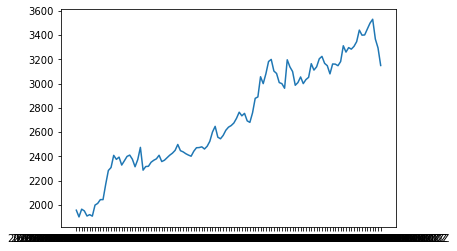

In [12]:
plt.plot(data['Close'])
plt.show()

In [13]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.03395347]
 [0.        ]
 [0.03913936]
 [0.03041653]
 [0.00465872]
 [0.01148129]
 [0.0039783 ]
 [0.05976032]
 [0.0683483 ]
 [0.08759616]
 [0.08744905]
 [0.16475312]
 [0.23490974]
 [0.24984216]
 [0.3114537 ]
 [0.29110859]
 [0.30251632]
 [0.26237166]
 [0.28405308]
 [0.30609618]
 [0.31269807]
 [0.29172158]
 [0.25376529]
 [0.28970485]
 [0.35179453]
 [0.23657707]
 [0.2549361 ]
 [0.25604561]
 [0.27655623]
 [0.2865786 ]
 [0.29393447]
 [0.31195023]
 [0.28004414]
 [0.28676863]
 [0.29959849]
 [0.31242836]
 [0.32253042]
 [0.33667208]
 [0.36646949]
 [0.33508444]
 [0.32904037]
 [0.31983327]
 [0.31280228]
 [0.30710761]
 [0.33240568]
 [0.34998008]
 [0.35081987]
 [0.35449168]
 [0.34358047]
 [0.35731143]
 [0.38248077]
 [0.42955834]
 [0.45811751]
 [0.4032611 ]
 [0.39532902]
 [0.4122843 ]
 [0.43839152]
 [0.45415147]
 [0.46212033]
 [0.47501149]
 [0.49880161]
 [0.52981273]
 [0.51141692]
 [0.52378705]
 [0.48595948]
 [0.47830325]
 [0.52638612]
 [0.59987127]
 [0.60698195]
 [0.70919177]
 [0.67430043]
 [0.72

In [14]:
train_length = int(len(scaled_data) * 0.7)
test_length = len(scaled_data) - train_length
train_data = scaled_data[0:train_length,:]
test_data = scaled_data[train_length:len(scaled_data),:]

print(len(scaled_data))
print(train_length)
print(test_length)

115
80
35


In [15]:
def create_dataset(dataset, timestep=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - timestep - 1):
        data_x.append(dataset[i:(i+timestep),0])
        data_y.append(dataset[i+timestep,0])
    return np.array(data_x), np.array(data_y)

In [21]:
timestep = 1
train_x, train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)

print('train_x shape = ', train_x.shape)
print('test_x shape = ', test_x.shape)
print('train_y shape = ', train_y.shape)
print('test_y shape = ', test_y.shape)
print(train_x)

train_x shape =  (78, 1)
test_x shape =  (33, 1)
train_y shape =  (78,)
test_y shape =  (33,)
[[0.03395347]
 [0.        ]
 [0.03913936]
 [0.03041653]
 [0.00465872]
 [0.01148129]
 [0.0039783 ]
 [0.05976032]
 [0.0683483 ]
 [0.08759616]
 [0.08744905]
 [0.16475312]
 [0.23490974]
 [0.24984216]
 [0.3114537 ]
 [0.29110859]
 [0.30251632]
 [0.26237166]
 [0.28405308]
 [0.30609618]
 [0.31269807]
 [0.29172158]
 [0.25376529]
 [0.28970485]
 [0.35179453]
 [0.23657707]
 [0.2549361 ]
 [0.25604561]
 [0.27655623]
 [0.2865786 ]
 [0.29393447]
 [0.31195023]
 [0.28004414]
 [0.28676863]
 [0.29959849]
 [0.31242836]
 [0.32253042]
 [0.33667208]
 [0.36646949]
 [0.33508444]
 [0.32904037]
 [0.31983327]
 [0.31280228]
 [0.30710761]
 [0.33240568]
 [0.34998008]
 [0.35081987]
 [0.35449168]
 [0.34358047]
 [0.35731143]
 [0.38248077]
 [0.42955834]
 [0.45811751]
 [0.4032611 ]
 [0.39532902]
 [0.4122843 ]
 [0.43839152]
 [0.45415147]
 [0.46212033]
 [0.47501149]
 [0.49880161]
 [0.52981273]
 [0.51141692]
 [0.52378705]
 [0.485959

In [17]:
print(train_x.shape)

(78, 1)


In [18]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

print(train_x)

[[[0.03395347]]

 [[0.        ]]

 [[0.03913936]]

 [[0.03041653]]

 [[0.00465872]]

 [[0.01148129]]

 [[0.0039783 ]]

 [[0.05976032]]

 [[0.0683483 ]]

 [[0.08759616]]

 [[0.08744905]]

 [[0.16475312]]

 [[0.23490974]]

 [[0.24984216]]

 [[0.3114537 ]]

 [[0.29110859]]

 [[0.30251632]]

 [[0.26237166]]

 [[0.28405308]]

 [[0.30609618]]

 [[0.31269807]]

 [[0.29172158]]

 [[0.25376529]]

 [[0.28970485]]

 [[0.35179453]]

 [[0.23657707]]

 [[0.2549361 ]]

 [[0.25604561]]

 [[0.27655623]]

 [[0.2865786 ]]

 [[0.29393447]]

 [[0.31195023]]

 [[0.28004414]]

 [[0.28676863]]

 [[0.29959849]]

 [[0.31242836]]

 [[0.32253042]]

 [[0.33667208]]

 [[0.36646949]]

 [[0.33508444]]

 [[0.32904037]]

 [[0.31983327]]

 [[0.31280228]]

 [[0.30710761]]

 [[0.33240568]]

 [[0.34998008]]

 [[0.35081987]]

 [[0.35449168]]

 [[0.34358047]]

 [[0.35731143]]

 [[0.38248077]]

 [[0.42955834]]

 [[0.45811751]]

 [[0.4032611 ]]

 [[0.39532902]]

 [[0.4122843 ]]

 [[0.43839152]]

 [[0.45415147]]

 [[0.46212033]

In [19]:
model = Sequential()
model.add(LSTM(256, input_shape=(1,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model.fit(train_x, train_y, epochs=1, batch_size=1, verbose=1)
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras model loss = ', score[0])
print('Keras model accuracy = ', score[1])

78/78 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.0128
Keras model loss =  0.04018601030111313
Keras model accuracy =  0.012820512987673283


In [45]:
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

print(train_predictions)

[[0.08147258]
 [0.0836935 ]
 [0.08364752]
 [0.0829964 ]
 [0.08094639]
 [0.08270025]
 [0.0819664 ]
 [0.08125198]
 [0.08358765]
 [0.0835048 ]
 [0.08418894]
 [0.0851174 ]
 [0.08407858]
 [0.08420566]
 [0.08485207]
 [0.08634692]
 [0.08652946]
 [0.08760378]
 [0.08628517]
 [0.08598018]
 [0.08567739]
 [0.08444723]
 [0.0818837 ]
 [0.08088818]
 [0.08286965]
 [0.08399403]
 [0.08551994]
 [0.08697993]
 [0.08616468]
 [0.08675051]
 [0.08560053]
 [0.08646896]
 [0.08784327]
 [0.08767146]
 [0.08713198]
 [0.08948764]
 [0.09061965]
 [0.09094706]
 [0.08927673]
 [0.08858895]
 [0.08968669]
 [0.09455863]
 [0.09592637]
 [0.09627166]
 [0.09715244]
 [0.09853306]
 [0.09843755]
 [0.09879789]
 [0.09835094]
 [0.10066885]
 [0.10288966]
 [0.10345814]
 [0.10286522]
 [0.10350561]
 [0.10560274]
 [0.10441613]
 [0.1008786 ]
 [0.10170013]
 [0.10102114]
 [0.10409856]
 [0.10374951]
 [0.10485685]
 [0.10650051]
 [0.1052759 ]
 [0.10592893]
 [0.10560429]
 [0.10429275]
 [0.10651153]
 [0.10603368]
 [0.10451657]
 [0.10550764]
 [0.10

In [46]:
train_predictions = scaler.inverse_transform(train_predictions)
train_y = scaler.inverse_transform([train_y])

test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform([test_y])

print(train_predictions)
print(test_predictions)

[[ 730.51086]
 [ 737.2833 ]
 [ 737.14307]
 [ 735.1576 ]
 [ 728.9063 ]
 [ 734.2545 ]
 [ 732.0167 ]
 [ 729.8382 ]
 [ 736.9605 ]
 [ 736.7079 ]
 [ 738.79407]
 [ 741.6253 ]
 [ 738.4576 ]
 [ 738.8451 ]
 [ 740.8162 ]
 [ 745.3746 ]
 [ 745.9312 ]
 [ 749.2072 ]
 [ 745.1863 ]
 [ 744.2562 ]
 [ 743.33295]
 [ 739.5817 ]
 [ 731.7645 ]
 [ 728.7288 ]
 [ 734.77106]
 [ 738.1997 ]
 [ 742.8528 ]
 [ 747.3049 ]
 [ 744.8189 ]
 [ 746.6053 ]
 [ 743.0986 ]
 [ 745.74677]
 [ 749.9375 ]
 [ 749.41364]
 [ 747.76855]
 [ 754.95184]
 [ 758.40375]
 [ 759.40216]
 [ 754.3087 ]
 [ 752.2114 ]
 [ 755.55884]
 [ 770.4152 ]
 [ 774.586  ]
 [ 775.6389 ]
 [ 778.3247 ]
 [ 782.5348 ]
 [ 782.2435 ]
 [ 783.34235]
 [ 781.97943]
 [ 789.0476 ]
 [ 795.8197 ]
 [ 797.55316]
 [ 795.7452 ]
 [ 797.69794]
 [ 804.0929 ]
 [ 800.4745 ]
 [ 789.6872 ]
 [ 792.1923 ]
 [ 790.1219 ]
 [ 799.5061 ]
 [ 798.4417 ]
 [ 801.8184 ]
 [ 806.8305 ]
 [ 803.09625]
 [ 805.0876 ]
 [ 804.09766]
 [ 800.09827]
 [ 806.86414]
 [ 805.407  ]
 [ 800.78076]
 [ 803.8029 ]
 [ 802

In [47]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_predictions)+1, :] = train_predictions

In [48]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[
    len(train_predictions)+2+1:len(scaled_data)-1, :] = test_predictions

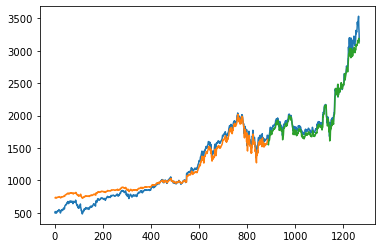

In [49]:
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [50]:
train_predictions

array([[ 730.51086],
       [ 737.2833 ],
       [ 737.14307],
       [ 735.1576 ],
       [ 728.9063 ],
       [ 734.2545 ],
       [ 732.0167 ],
       [ 729.8382 ],
       [ 736.9605 ],
       [ 736.7079 ],
       [ 738.79407],
       [ 741.6253 ],
       [ 738.4576 ],
       [ 738.8451 ],
       [ 740.8162 ],
       [ 745.3746 ],
       [ 745.9312 ],
       [ 749.2072 ],
       [ 745.1863 ],
       [ 744.2562 ],
       [ 743.33295],
       [ 739.5817 ],
       [ 731.7645 ],
       [ 728.7288 ],
       [ 734.77106],
       [ 738.1997 ],
       [ 742.8528 ],
       [ 747.3049 ],
       [ 744.8189 ],
       [ 746.6053 ],
       [ 743.0986 ],
       [ 745.74677],
       [ 749.9375 ],
       [ 749.41364],
       [ 747.76855],
       [ 754.95184],
       [ 758.40375],
       [ 759.40216],
       [ 754.3087 ],
       [ 752.2114 ],
       [ 755.55884],
       [ 770.4152 ],
       [ 774.586  ],
       [ 775.6389 ],
       [ 778.3247 ],
       [ 782.5348 ],
       [ 782.2435 ],
       [ 783.

In [51]:
print(len(data['Close']))
print(len(train_predictions))
print(len(test_predictions))
data

1268
885
379


,Close
Date,
2015-08-26T00:00:00.000Z,500.77
2015-08-27T00:00:00.000Z,518.37
2015-08-28T00:00:00.000Z,518.01
2015-08-31T00:00:00.000Z,512.89
2015-09-01T00:00:00.000Z,496.54
...,...
2020-09-01T00:00:00.000Z,3499.12
2020-09-02T00:00:00.000Z,3531.45
2020-09-03T00:00:00.000Z,3368.00


In [52]:
data['AITrain'] = train_predict_plot
data['AITest'] = test_predict_plot

In [53]:
data.tail(15)

,Close,AITrain,AITest
Date,,,
2020-08-18T00:00:00.000Z,3312.49,NaN,3027.609375
2020-08-19T00:00:00.000Z,3260.48,NaN,3095.146729
2020-08-20T00:00:00.000Z,3297.37,NaN,3069.223145
2020-08-21T00:00:00.000Z,3284.72,NaN,3087.754883
2020-08-24T00:00:00.000Z,3307.46,NaN,3081.480225
2020-08-25T00:00:00.000Z,3346.49,NaN,3092.700684
2020-08-26T00:00:00.000Z,3441.85,NaN,3111.345703
2020-08-27T00:00:00.000Z,3400.00,NaN,3153.764160
2020-08-28T00:00:00.000Z,3401.80,NaN,3135.682373


In [54]:
data.to_csv(ticker+'_predict.csv')